### –û–±—Ä–∞—Ç–Ω–∞—è —Å–≤—è–∑—å –ø–æ –ø—Ä–æ–µ–∫—Ç—É 
–®–∏–Ω–∫–∞—Ä–µ–Ω–∫–æ –Ø–Ω–∞   
Telegram: [—Ç—ã–∫](https://t.me/sirena0789)

# –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
%pip install vininfo
%pip install catboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import pickle
import bisect

from vininfo import Vin
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

from catboost import Pool, CatBoostRegressor, CatBoostClassifier, cv
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏

## –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

#### –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [2]:
def graph(df, color):
    cat_columns = df.drop(['model', 'trim', 'vin', 'saledate', 'seller'] ,axis=1).columns.to_list()
    numeric = df.select_dtypes(exclude='object').columns.to_list()
    f_size = (20, 80)
    plt.figure(figsize=f_size)
    for i, feature in enumerate(cat_columns):
        plt.subplot(9, 1, i+1)
        plt.subplots_adjust(wspace=0.3, hspace=0.6)
        df[feature].hist(bins=100, color=color)
        plt.title(feature)
        plt.xticks(rotation=90)
        plt.xlabel("–ó–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∞")
        plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ")
    return

#### –§—É–Ω–∫—Ü–∏—è –≤—ã–≤–æ–¥–∞ –æ—Å–Ω–æ–≤–Ω—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [3]:
def hello(df, color):
    print('–ü—Ä–∏–º–µ—Ä —Å—Ç—Ä–æ–∫ \n')
    display(df.head(5))
    print('–†–∞–∑–º–µ—Ä —Ñ—Ä–µ–π–º–∞:', df.shape)
    print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:', df.duplicated().sum())
    print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤:', df.isnull().sum().sum ())
    print('–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ \n')
    display(df.describe())
    print('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ \n')
    graph(df, color)
    return

### train

In [4]:
try:
    train = pd.read_csv("/Users/sirena0789/Desktop/–ê–≤—Ç–æ–º–æ–±–∏–ª–∏/data/train.csv")
except:
    train = pd.read_csv("/content/drive/MyDrive/car_cost/train.csv")

–ü—Ä–∏–º–µ—Ä —Å—Ç—Ä–æ–∫ 



year    make   model    trim   body transmission                vin state  \
0  2011    Ford    Edge     SEL    suv    automatic  2fmdk3jc4bba41556    md   
1  2014    Ford  Fusion      SE  Sedan    automatic  3fa6p0h75er208976    mo   
2  2012  Nissan  Sentra  2.0 SL  sedan    automatic  3n1ab6ap4cl698412    nj   
3  2003  HUMMER      H2    Base    suv    automatic  5grgn23u93h101360    tx   
4  2007    Ford  Fusion     SEL  Sedan    automatic  3fahp08z17r268380    md   

   condition  odometer  color interior                      seller  \
0        4.2  111041.0  black    black          santander consumer   
1        3.5   31034.0  black    black       ars/avis budget group   
2        2.2   35619.0  black    black          nissan-infiniti lt   
3        2.8  131301.0   gold    beige  wichita falls ford lin inc   
4        2.0  127709.0  black    black                purple heart   

                                  saledate  
0  Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)  
1  Wed Feb 25 2015 02:00:00 GMT-0800 (PST)  
2  Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)  
3  Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)  
4  Tue Feb 03 2015 04:00:00 GMT-0800 (PST)

–†–∞–∑–º–µ—Ä —Ñ—Ä–µ–π–º–∞: (440236, 14)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 97003
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 



year      condition       odometer
count  440236.000000  430831.000000  440167.000000
mean     2010.040101       3.425077   68344.421604
std         3.977945       0.949973   53542.203908
min      1982.000000       1.000000       1.000000
25%      2007.000000       2.700000   28258.000000
50%      2012.000000       3.600000   52098.000000
75%      2013.000000       4.200000   99272.000000
max      2015.000000       5.000000  999999.000000

–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 



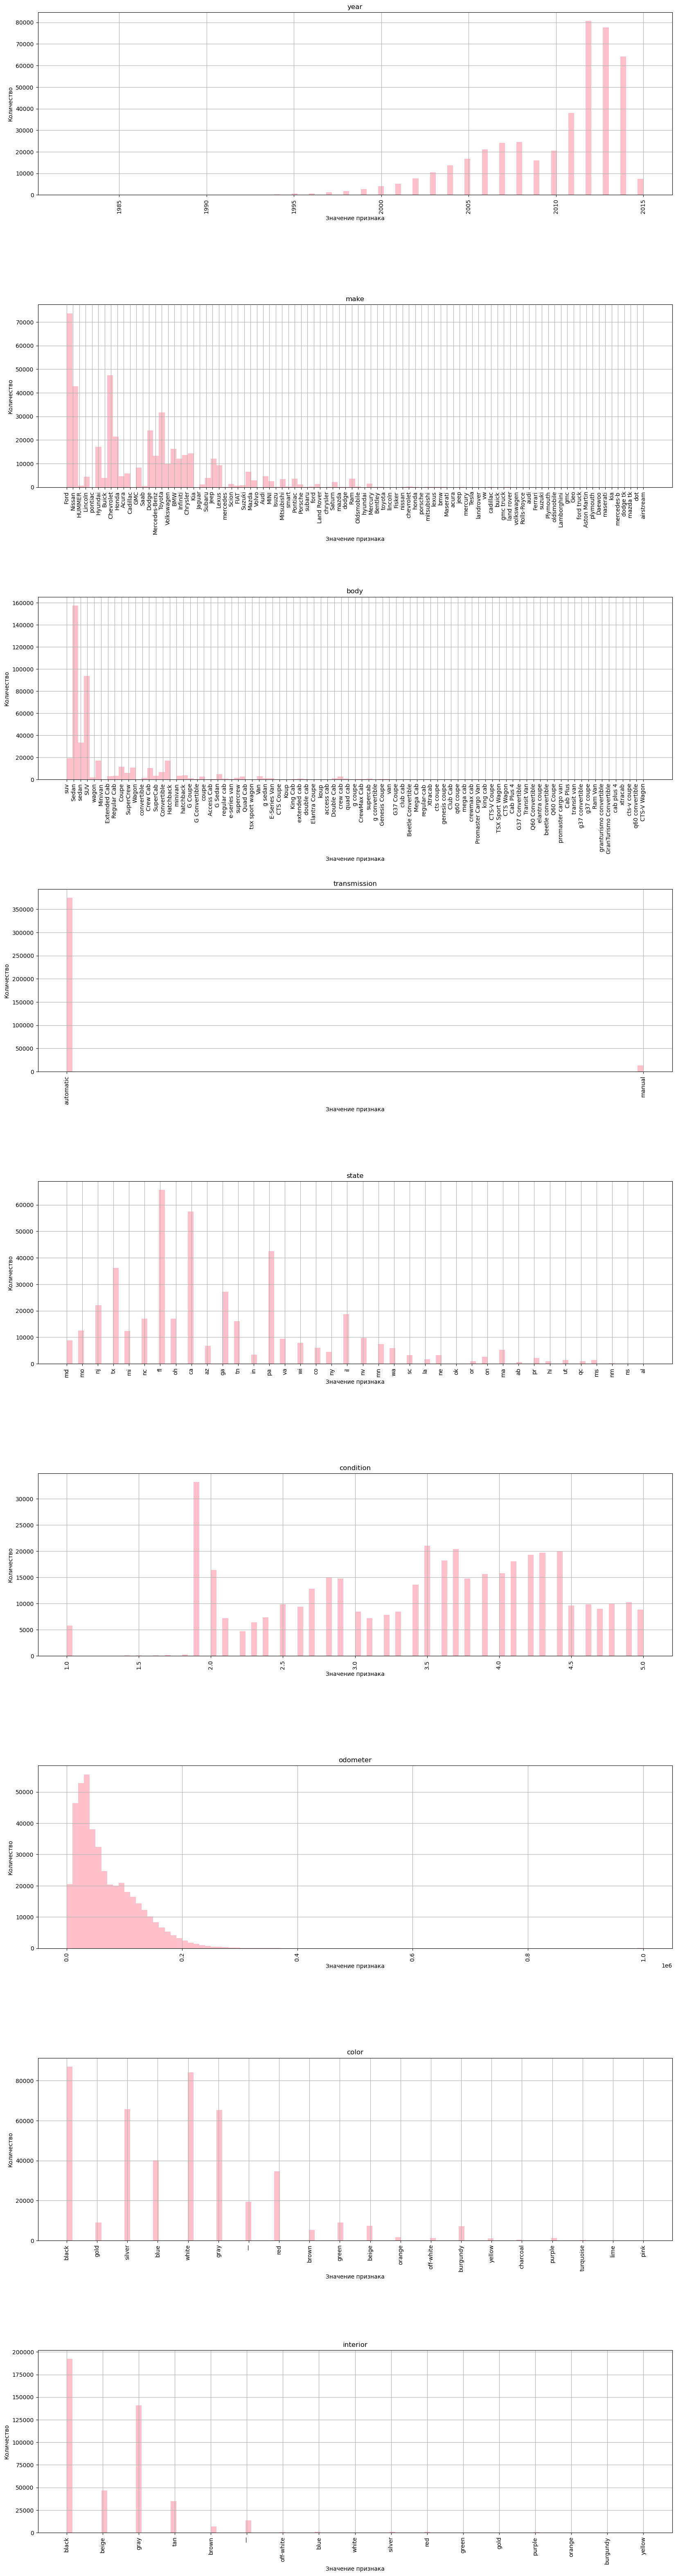

In [5]:
hello(train.drop('sellingprice', axis=1), 'pink')

Text(0.5, 1.0, 'sellingprice')

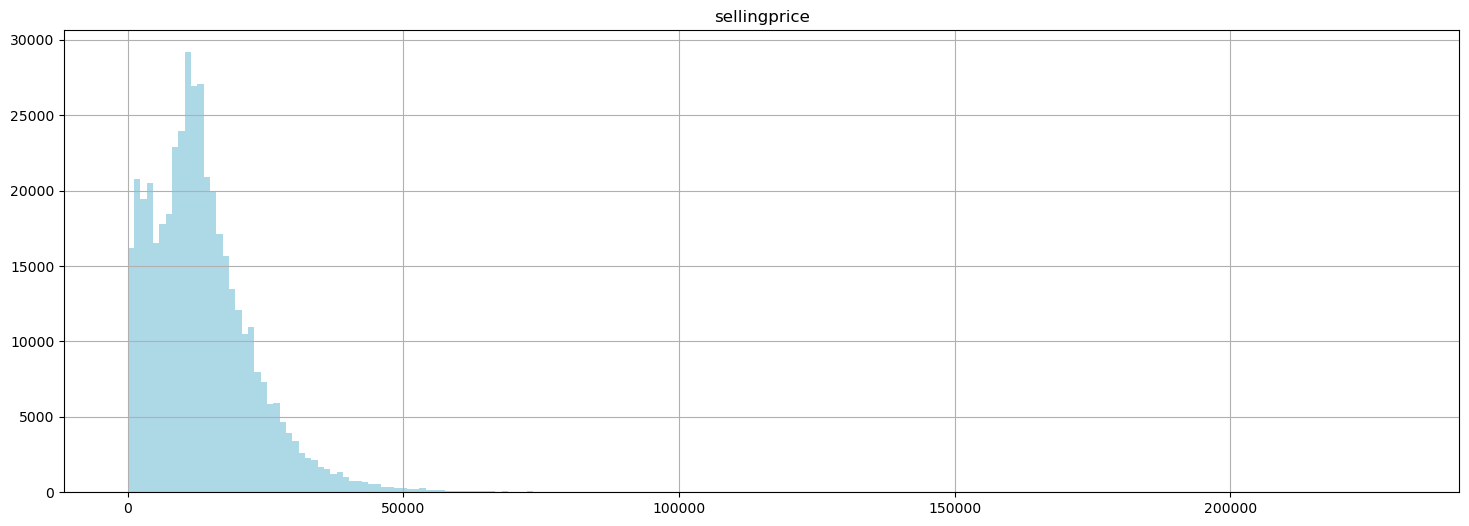

In [6]:
train['sellingprice'].hist(bins=200, figsize=(18, 6), color='lightblue')
plt.title('sellingprice')

### test

In [7]:
try:
    test = pd.read_csv("/Users/sirena0789/Desktop/–ê–≤—Ç–æ–º–æ–±–∏–ª–∏/data/test.csv")
except:
    test = pd.read_csv("/content/drive/MyDrive/car_cost/test.csv")

–ü—Ä–∏–º–µ—Ä —Å—Ç—Ä–æ–∫ 



year       make         model      trim      body transmission  \
0  2005   Cadillac           CTS      Base     Sedan    automatic   
1  2014        GMC  Savana Cargo      2500       Van          NaN   
2  2013     Nissan        Murano         S       SUV    automatic   
3  2013  Chevrolet        Impala  LS Fleet     Sedan    automatic   
4  2013     Nissan         Titan        SV  Crew Cab    automatic   

                 vin state  condition  odometer   color interior  \
0  1g6dp567450124779    ca        2.7  116970.0  silver    black   
1  1gtw7fca7e1902207    pa        4.4    6286.0   white     gray   
2  jn8az1mw6dw303497    oh        4.6   11831.0    gray    black   
3  2g1wf5e34d1160703    fl        2.3   57105.0  silver    black   
4  1n6aa0ec3dn301209    tn        2.9   31083.0   black    black   

                                             seller  \
0                            lexus of stevens creek   
1                                            u-haul   
2                                nissan-infiniti lt   
3  onemain rem/auto club of miami inc dba north dad   
4                         nissan north america inc.   

                                  saledate  
0  Wed Jan 14 2015 04:30:00 GMT-0800 (PST)  
1  Fri Feb 27 2015 01:00:00 GMT-0800 (PST)  
2  Tue Feb 24 2015 01:30:00 GMT-0800 (PST)  
3  Fri Mar 06 2015 02:00:00 GMT-0800 (PST)  
4  Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)

–†–∞–∑–º–µ—Ä —Ñ—Ä–µ–π–º–∞: (110058, 14)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 24573
–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 



year      condition       odometer
count  110058.000000  107679.000000  110039.000000
mean     2010.060005       3.423222   68074.331601
std         3.960190       0.951301   53520.988173
min      1982.000000       1.000000       1.000000
25%      2007.000000       2.700000   28313.500000
50%      2012.000000       3.600000   51922.000000
75%      2013.000000       4.200000   98852.500000
max      2015.000000       5.000000  999999.000000

–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ 



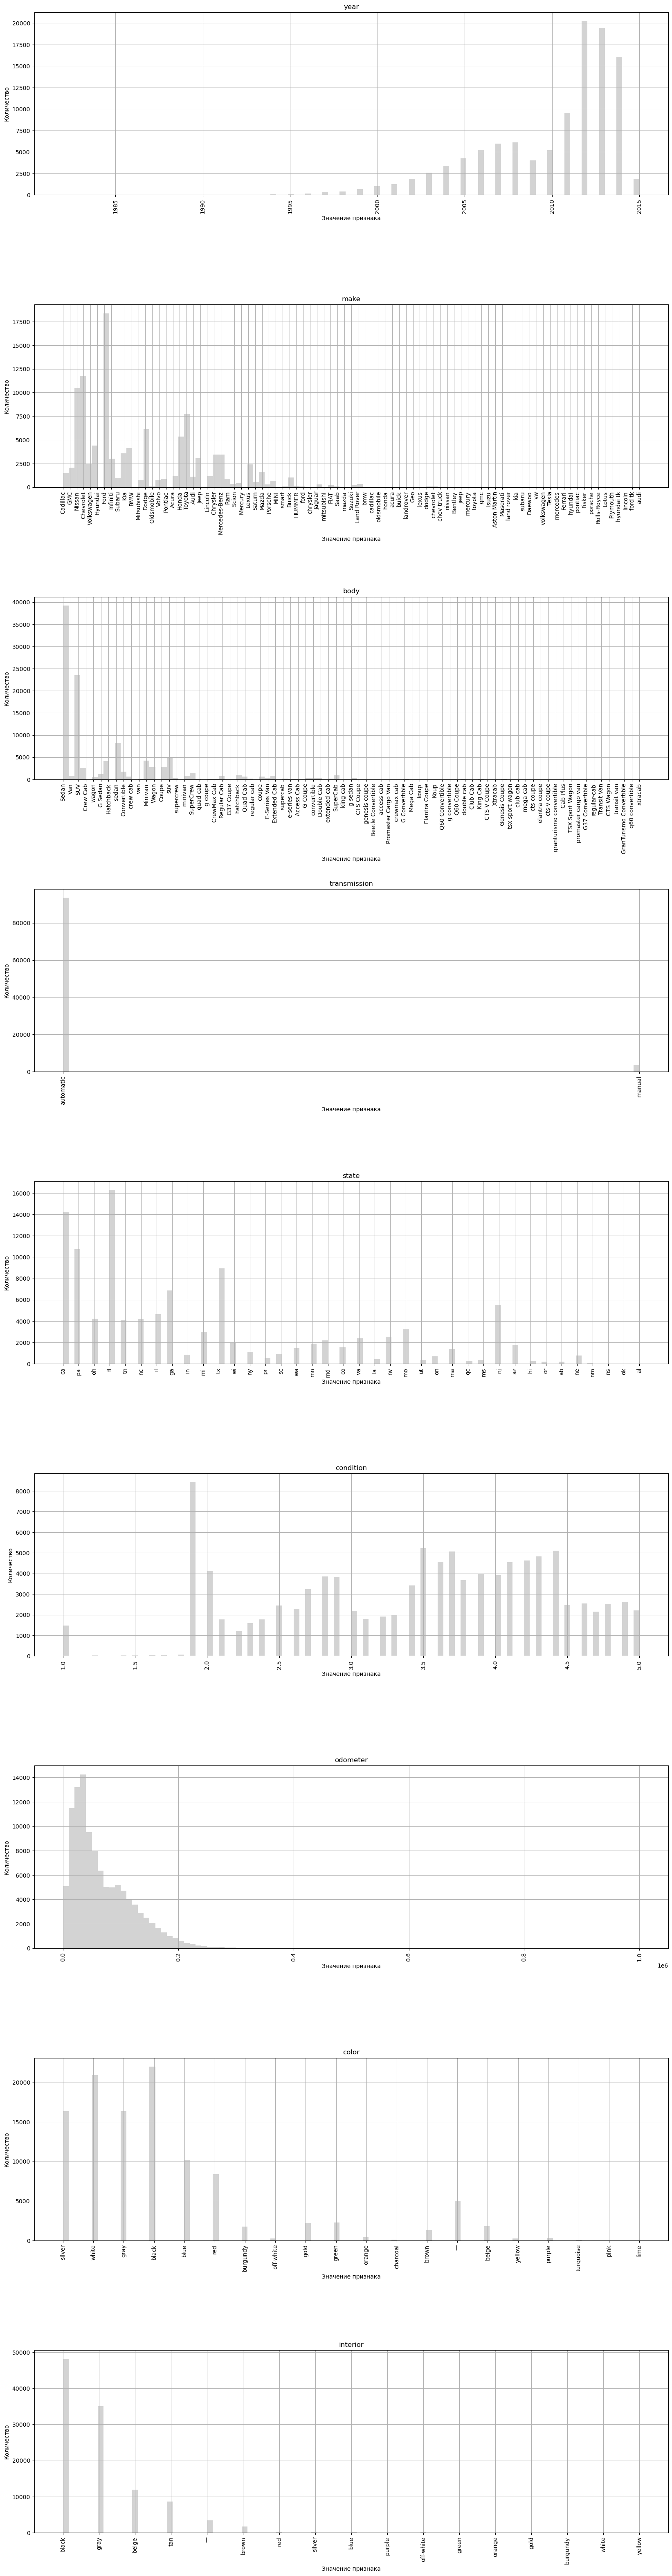

In [8]:
hello(test, 'lightgray')

# –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

## –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

#### –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–Ω–∏–∂–µ–Ω–∏—è —Ä–µ–≥–∏—Å—Ç—Ä–∞

In [ ]:
def reg_low(df):
    col_cat = ['make', 'model', 'trim', 'body', 'state', 'color', 'interior', 'seller']
    for i in col_cat:
        df[i] = df[i].str.lower()

#### –§—É–Ω–∫—Ü–∏—è –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è —Å—Ç–æ–ª–±—Ü–∞ —Å –¥–∞—Ç–æ–π –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è –≤–æ–∑—Ä–∞—Å—Ç–∞ –º–∞—à–∏–Ω—ã –∏ –¥–Ω—è –Ω–µ–¥–µ–ª–∏ –ø—Ä–æ–¥–∞–∂–∏

In [ ]:
def change_date(df):
    df['saledate'] = pd.to_datetime(df['saledate'], utc=True)
    df['saleyaer'] = pd.DatetimeIndex(df['saledate']).year
    df['weekday'] = df['saledate'].dt.weekday
    df['machineage'] =  df['saleyaer'] - df['year']
    df = df.drop(['saledate'], axis=1)
    return(df)

## –û—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å

#### –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ñ–æ—Ä–º–∞—Ç–∞ –¥–∞—Ç—ã –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [ ]:
train = change_date(train)

test = change_date(test)

#### –ò–∑–º–µ–Ω–µ–Ω–∏–µ 141 —Å—Ç—Ä–æ–∫–∏ —Å machineage = -1 –Ω–∞ 0

In [ ]:
train.loc[train['machineage'] < 0, 'machineage'] = 0

#### –ò–∑–º–µ–Ω–µ–Ω–∏–µ 29 —Å—Ç—Ä–æ–∫ —Å machineage = -1

In [ ]:
test.loc[test['machineage'] < 0, 'machineage'] = 0

#### –£–¥–∞–ª–µ–Ω–∏–µ 1 —Å—Ç—Ä–æ–∫–∏ —Å sellingprice = 1

In [ ]:
train = train[train['sellingprice'] >= 100]

#### –ü–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞ –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è –Ω–µ—è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

In [ ]:
reg_low(train)

reg_low(test)

# –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤

## –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

#### –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è make —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º vininfo

In [ ]:
def vin(df):
    df.loc[df['make'].isnull(), 'make'] = df.loc[df['make'].isnull()].apply(
        lambda row: Vin(row['vin']).manufacturer, axis=1)
    return (df)

#### –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –º—É–ª—å—Ç–∏–∫–ª–∞—Å—Å–æ–≤—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤

In [ ]:
def filling_multiclass(df1, df2, column, columns, encoder_columns):

    name1 = df1.columns
    df_test1 = df1.loc[df1[column].isnull()]
    ind1 = df_test1.index

    name2 = df2.columns
    df_test2 = df2.loc[df2[column].isnull()]
    ind2 = df_test2.index

    df_train1 = df1.loc[df1[column].notna()]
    df_train2 = df2.loc[df2[column].notna()]


    df_target = df_train1[column]
    df_features = df_train1.drop(columns, axis=1)
    df_features = df_features.drop(['sellingprice'], axis=1)
    df_features = df_features.drop(column, axis=1)


    df_test1_new = df_test1.drop(column, axis=1)
    df_test2_new = df_test2.drop(column, axis=1)

    df_test1 = df_test1.drop(column, axis=1)
    df_test1 = df_test1.drop(columns, axis=1)
    df_test2 = df_test2.drop(column, axis=1)
    df_test2 = df_test2.drop(columns, axis=1)

    df_test1 = df_test1.drop(['sellingprice'], axis=1)

    le = LabelEncoder()

    for i in encoder_columns:
        df_features[i] = le.fit_transform(df_features[i])
        df_test1[i] = df_test1[i].map(lambda s: 'other' if s not in le.classes_ else s)
        df_test2[i] = df_test2[i].map(lambda s: 'other' if s not in le.classes_ else s)
        le_classes = le.classes_.tolist()
        bisect.insort_left(le_classes, 'other')
        le.classes_ = np.array(le_classes)
        df_test1[i] = le.transform(df_test1[i])
        df_test2[i] = le.transform(df_test2[i])

    features_train, features_valid, target_train, target_valid = train_test_split(
        df_features, df_target, test_size=0.25, random_state=1234)

    model = RandomForestClassifier(random_state=12345, criterion = 'entropy')

    model.fit(features_train, target_train)

    accuracy = accuracy_score(target_valid, model.predict(features_valid))
    target_predict1 = model.predict(df_test1)
    target_predict2 = model.predict(df_test2)

    target_predict1 = pd.Series(data=target_predict1, index=ind1)
    target_predict2 = pd.Series(data=target_predict2, index=ind2)

    df_test1_new[column] = target_predict1
    df_test2_new[column] = target_predict2

    df_test1_new = df_test1_new[name1]
    df_test2_new = df_test2_new[name2]

    df_new1 = pd.concat([df_train1, df_test1_new], axis=0)
    df_new2 = pd.concat([df_train2, df_test2_new], axis=0)
    return df_new1, df_new2, accuracy

#### –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –±–∏–Ω–∞—Ä–Ω—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤

In [ ]:
def filling_binary(df1, df2, column, columns):

    name1 = df1.columns
    df_test1 = df1.loc[df1[column].isnull()]
    ind1 = df_test1.index

    name2 = df2.columns
    df_test2 = df2.loc[df2[column].isnull()]
    ind2 = df_test2.index

    df_train1 = df1.loc[df1[column].notna()]
    df_train2 = df2.loc[df2[column].notna()]


    df_target = df_train1[column]
    df_features = df_train1.drop(columns, axis=1)
    df_features = df_features.drop(['sellingprice'], axis=1)
    df_features = df_features.drop(column, axis=1)


    df_test1_new = df_test1.drop(column, axis=1)
    df_test2_new = df_test2.drop(column, axis=1)

    df_test1 = df_test1.drop(column, axis=1)
    df_test1 = df_test1.drop(columns, axis=1)
    df_test2 = df_test2.drop(column, axis=1)
    df_test2 = df_test2.drop(columns, axis=1)

    df_test1 = df_test1.drop(['sellingprice'], axis=1)

    features_train, features_valid, target_train, target_valid = train_test_split(
        df_features, df_target, test_size=0.25, random_state=1234)

    model = CatBoostClassifier(learning_rate=0.2, random_state=1234, verbose=False, task_type="GPU",
                          cat_features=["make","model","trim",
                                        "body","state","color", "interior", "seller"])

    model.fit(features_train, target_train)

    accuracy = accuracy_score(target_valid, model.predict(features_valid))
    target_predict1 = model.predict(df_test1)
    target_predict2 = model.predict(df_test2)

    target_predict1 = pd.Series(data=target_predict1, index=ind1)
    target_predict2 = pd.Series(data=target_predict2, index=ind2)

    df_test1_new[column] = target_predict1
    df_test2_new[column] = target_predict2

    df_test1_new = df_test1_new[name1]
    df_test2_new = df_test2_new[name2]

    df_new1 = pd.concat([df_train1, df_test1_new], axis=0)
    df_new2 = pd.concat([df_train2, df_test2_new], axis=0)
    return df_new1, df_new2, accuracy

#### –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è —á–∏—Å–ª–µ–Ω–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤

In [ ]:
def filling_regressor(df1, df2, column, columns):

    name1 = df1.columns
    df_test1 = df1.loc[df1[column].isnull()]
    ind1 = df_test1.index

    name2 = df2.columns
    df_test2 = df2.loc[df2[column].isnull()]
    ind2 = df_test2.index

    df_train1 = df1.loc[df1[column].notna()]
    df_train2 = df2.loc[df2[column].notna()]


    df_target = df_train1[column]
    df_features = df_train1.drop(columns, axis=1)
    df_features = df_features.drop(['sellingprice'], axis=1)
    df_features = df_features.drop(column, axis=1)


    df_test1_new = df_test1.drop(column, axis=1)
    df_test2_new = df_test2.drop(column, axis=1)

    df_test1 = df_test1.drop(column, axis=1)
    df_test1 = df_test1.drop(columns, axis=1)
    df_test2 = df_test2.drop(column, axis=1)
    df_test2 = df_test2.drop(columns, axis=1)

    df_test1 = df_test1.drop(['sellingprice'], axis=1)

    features_train, features_valid, target_train, target_valid = train_test_split(
        df_features, df_target, test_size=0.25, random_state=1234)

    model = CatBoostRegressor(random_state=12345, task_type="GPU", eval_metric="RMSE",
                              cat_features=['make', 'model', 'trim', 'body',
                                            'state','color','interior', 'seller', 'transmission'],
                              learning_rate=0.2, verbose= False)

    model.fit(features_train, target_train)

    MSE = mean_squared_error(target_valid, model.predict(features_valid))
    target_predict1 = model.predict(df_test1)
    target_predict2 = model.predict(df_test2)

    target_predict1 = pd.Series(data=target_predict1, index=ind1)
    target_predict2 = pd.Series(data=target_predict2, index=ind2)

    df_test1_new[column] = target_predict1
    df_test2_new[column] = target_predict2

    df_test1_new = df_test1_new[name1]
    df_test2_new = df_test2_new[name2]

    df_new1 = pd.concat([df_train1, df_test1_new], axis=0)
    df_new2 = pd.concat([df_train2, df_test2_new], axis=0)
    return df_new1, df_new2, MSE

## –û—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å

#### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ 'color', 'interior'

In [ ]:
train['color'] = train['color'].fillna('-')
train['interior'] = train['interior'].fillna('-')

test['color'] = test['color'].fillna('-')
test['interior'] = test['interior'].fillna('-')

#### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ 'make'

In [ ]:
train = vin(train)

test = vin(test)

#### –£–¥–∞–ª–µ–Ω–∏–µ –≤–∏–Ω

In [ ]:
train = train.drop(['vin'], axis=1)

#### –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–æ–≤ –∏ –≤–∏–Ω–∞ –∏–∑ —Ç–µ—Å—Ç–∞ –¥–ª—è –∏—Ç–æ–≥–æ–≤–æ–≥–æ —Ñ–∞–π–ª–∞

In [ ]:
ind = test.index
vin_test = test['vin']
vin_test = pd.DataFrame(data=vin_test, index=ind)
test = test.drop(['vin'], axis=1)

#### –ü–æ–≤—Ç–æ—Ä–Ω–æ–µ –ø–æ–Ω–∏–∂–µ–Ω–∏–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞ –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è'make'

In [ ]:
reg_low(train)
reg_low(test)

#### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ 'model'

In [ ]:
column = 'model'
columns = ['trim','body','transmission','condition' ,
           'odometer', 'saleyaer', 'weekday']
encoder_columns = ['make', 'state','color', 'interior', 'seller']

train, test, acc = filling_multiclass(train, test, column, columns, encoder_columns)

#### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ 'trim'

In [ ]:
column = 'trim'
columns = ['body','transmission','condition' ,
           'odometer', 'saleyaer', 'weekday']
encoder_columns = ['make', 'model', 'state','color', 'interior', 'seller']

train, test, acc = filling_multiclass(train, test, column, columns, encoder_columns)

#### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ 'body'

In [ ]:
column = 'body'
columns = ['transmission','condition' ,
           'odometer', 'saleyaer', 'weekday']
encoder_columns = ['make', 'model', 'trim', 'state','color', 'interior', 'seller']

train, test, acc = filling_multiclass(train, test, column, columns, encoder_columns)

#### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ 'transmission'

In [ ]:
column = 'transmission'
columns = ['condition' , 'odometer', 'saleyaer', 'weekday']

train, test, acc = filling_binary(train, test, column, columns)

#### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ 'condition'

In [ ]:
column = 'condition'
columns = ['odometer', 'saleyaer', 'weekday']

train, test, MSE = filling_regressor(train, test, column, columns)

#### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ 'odometer'

In [ ]:
column = 'odometer'
columns = ['saleyaer', 'weekday']

train, test, MSE = filling_regressor(train, test, column, columns)

### –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã—Ö —Ñ—Ä–µ–π–º–æ–≤ –≤ —Ñ–∞–π–ª

In [ ]:
try:
    train.to_csv("/Users/sirena0789/Desktop/–ê–≤—Ç–æ–º–æ–±–∏–ª–∏/data/train_notnull.csv")
    test.to_csv("/Users/sirena0789/Desktop/–ê–≤—Ç–æ–º–æ–±–∏–ª–∏/data/test_notnul.csv")
except:
    test.to_csv('/content/drive/MyDrive/car_cost/test_notnull.csv')
    train.to_csv('/content/drive/MyDrive/car_cost/train_notnull.csv')

### –ò–∑—å—è—Ç–∏–µ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã—Ö —Ñ—Ä–µ–π–º–æ–≤ –∏–∑ —Ñ–∞–π–ª–∞ (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ)

In [3]:
try:
    train = pd.read_csv("/Users/sirena0789/Desktop/–ê–≤—Ç–æ–º–æ–±–∏–ª–∏/data/train_notnull.csv", index_col=0)
    test = pd.read_csv("/Users/sirena0789/Desktop/–ê–≤—Ç–æ–º–æ–±–∏–ª–∏/data/test_notnull.csv", index_col=0)
except:
    train = pd.read_csv("/content/drive/MyDrive/car_cost/train_notnull.csv", index_col=0)
    test = pd.read_csv("/content/drive/MyDrive/car_cost/test_notnull.csv", index_col=0)

[–°—Å—ã–ª–∫–∞ –Ω–∞ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–µ –¥–∞—Ç–∞—Å–µ—Ç—ã](https://drive.google.com/drive/folders/1n89ZU-HF6zEn8884_VD39Ro-ZEek1kWx?usp=sharing)

# –†–∞–±–æ—Ç–∞ —Å –≤—ã–±–æ—Ä–∫–∞–º–∏

## –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏

### –§—É–Ω–∫—Ü–∏—è –¥–ª—è LabelEncoder()

In [4]:
def LE(df_features, df_test, cat_columns):
    le = LabelEncoder()
    for i in cat_columns:
        df_features[i] = le.fit_transform(df_features[i])
        df_test[i] = df_test[i].map(lambda s: 'other' if s not in le.classes_ else s)
        le_classes = le.classes_.tolist()
        bisect.insort_left(le_classes, 'other')
        le.classes_ = np.array(le_classes)
        df_test[i] = le.transform(df_test[i])
    return df_features, df_test

### –§—É–Ω–∫—Ü–∏—è –¥–ª—è StandardScaler()

In [5]:
def scaler(features_train,features_test, columns):
    scaler = StandardScaler()

    scaler.fit(features_train[columns])

    features_train = features_train.copy()
    features_train[columns] = scaler.transform(features_train[columns])

    features_test = features_test.copy()
    features_test[columns] = scaler.transform(features_test[columns])
    return features_train, features_test

### –§—É–Ω–∫—Ü–∏—è –¥–ª—è OHE()

In [ ]:
def OHE(df1, df2):
    
    cat_columns = df1.select_dtypes(include='object').columns.to_list()

    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(df1[cat_columns]).toarray())
    df1_enc = df1.join(encoder_df)
    df1 = df1_enc.drop(cat_columns, axis=1)
    
    encoder_df = pd.DataFrame(encoder.transform(df2[cat_columns]).toarray())
    df2_enc = df2.join(encoder_df)
    df2 = df2_enc.drop(cat_columns, axis=1)
    
    return df1, df2

## –û—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å

### –°–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–µ —Ç—Ä–µ—Ö –ø–∞—Ä –≤—ã–±–æ—Ä–æ–∫ –¥–ª—è —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è

In [6]:
features_original = train.drop('sellingprice', axis=1)
test_original = test.copy()

features_le = train.drop('sellingprice', axis=1)
test_le = test.copy()

features_ohe = train.drop('sellingprice', axis=1)
test_ohe = test.copy()

target = train['sellingprice']

### –í—ã—è–≤–ª–µ–Ω–∏–µ –∫–æ—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∏ —á–∏—Å–ª–µ–Ω–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤

In [7]:
cat_columns = features_original.select_dtypes(include='object').columns.to_list()
numeric = features_original.select_dtypes(exclude='object').columns.to_list()

### –û–±—Ä–∞–±–æ—Ç–∫–∞  –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é StandardScaler

In [25]:
features_original, test_original = scaler(features_original, test_original, numeric)

### –û–±—Ä–∞–±–æ—Ç–∫–∞  –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é LabelEncoder

In [8]:
features_le, test_le = scaler(features_le, test_le, numeric)
features_le, test_le = LE(features_le, test_le, cat_columns)

### –û–±—Ä–∞–±–æ—Ç–∫–∞  –≤—ã–±–æ—Ä–∫–∏ —Å –ø–æ–º–æ—â—å—é OHE

In [ ]:
features_ohe, test_ohe = scaler(features_ohe, test_ohe, numeric)
features_ohe, test_ohe = OHE(features_ohe, test_ohe)

### –î–µ–ª–µ–Ω–∏–µ –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é

In [27]:
features_original_train, features_original_valid, target_original_train, target_original_valid = train_test_split(
    features_original, target, test_size=0.25, random_state=1234)

In [9]:
features_le_train, features_le_valid, target_le_train, target_le_valid = train_test_split(
    features_le, target, test_size=0.25, random_state=1234)

In [ ]:
features_ohe_train, features_ohe_valid, target_ohe_train, target_ohe_valid = train_test_split(
    features_ohe, target, test_size=0.25, random_state=1234)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π

### –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è mape

In [10]:
def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

## CatBoost

### –û—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞

In [28]:
%%time

model = CatBoostRegressor(cat_features=['make', 'model', 'trim', 'body',
                                 'transmission', 'state','color',
                                 'interior', 'seller']) #, task_type='GPU'

params = [{'learning_rate':[0.01, 0.03],
           'iterations':[1000, 3000],
           'random_state':[1234],
           'verbose':[False]}]

cbr_or = GridSearchCV(estimator = model, param_grid = params, cv = 2,
                   n_jobs = -1, scoring='neg_mean_absolute_percentage_error', 
                      error_score='raise')

cbr_or.fit(features_original_train, target_original_train)

pred = cbr_or.predict(features_original_valid)
MAPE_CBR_original = mape(target_original_valid, pred)
print("MAPE:", MAPE_CBR_original)

print("Best parameters:")
print(cbr_or.best_params_)

MAPE: 0.1791468396640985
Best parameters:
{'iterations': 3000, 'learning_rate': 0.03, 'random_state': 1234, 'verbose': False}
CPU times: user 21min 55s, sys: 25.9 s, total: 22min 21s
Wall time: 13min 33s


### LabelEncoder –≤—ã–±–æ—Ä–∫–∞

In [30]:
%%time

model = CatBoostRegressor(random_state=1234) #, task_type='GPU'

params = [{'learning_rate':[0.01, 0.03],
           'iterations':[1000, 3000],
           'random_state':[1234],
           'verbose':[False]}]

cbr_le = GridSearchCV(estimator = model, param_grid = params, cv = 2,
                   n_jobs = -1, scoring='neg_mean_absolute_percentage_error',
                      error_score='raise')

cbr_le.fit(features_le_train, target_le_train)

pred = cbr_le.predict(features_le_valid)
MAPE_CBR_LE = mape(target_le_valid, pred)
print("MAPE:", MAPE_CBR_LE)

print("Best parameters:")
print(cbr_le.best_params_)

MAPE: 0.20897658475374445
Best parameters:
{'iterations': 3000, 'learning_rate': 0.03, 'random_state': 1234, 'verbose': False}
CPU times: user 2min 25s, sys: 10.8 s, total: 2min 36s
Wall time: 1min 25s


### OHE –≤—ã–±–æ—Ä–∫–∞

In [ ]:
%%time

model = CatBoostRegressor() #, task_type='GPU'

params = [{'learning_rate':[0.01, 0.03],
           'iterations':[1000, 3000],
          'random_state':[1234],
          'verbose':[False]}]

cbr_ohe = GridSearchCV(estimator = model, param_grid = params, cv = 2,
                   n_jobs = -1, scoring='neg_mean_absolute_percentage_error', 
                       error_score='raise')

cbr_ohe.fit(features_ohe_train, target_ohe_train)

pred = cbr_ohe.predict(features_ohe_valid)
MAPE_CBR_OHE = mape(target_ohe_valid, pred)
print("Best parameters:")
print(clf.best_params_)
print("MAPE:", MAPE_CBR_OHE)

## DecisionTreeRegressor

### LabelEncoder –≤—ã–±–æ—Ä–∫–∞

In [21]:
%%time

model = DecisionTreeRegressor()

params = [{'max_depth': range(1, 30, 2),
          'random_state':[1234]}]

dtr = GridSearchCV(estimator = model, param_grid = params, cv = 2, 
                       scoring='neg_mean_absolute_percentage_error', error_score='raise')

dtr.fit(features_le_train, target_le_train)

pred = dtr.predict(features_le_valid)
MAPE_DTR_le = mape(target_le_valid, pred)
print("MAPE:", MAPE_DTR_le)

print("Best parameters:")
print(dtr.best_params_)

MAPE: 0.23331688830163927
Best parameters:
{'max_depth': 19, 'random_state': 1234}
CPU times: user 24 s, sys: 222 ms, total: 24.2 s
Wall time: 24.2 s


### OHE –≤—ã–±–æ—Ä–∫–∞

In [ ]:
%%time


model = DecisionTreeRegressor()

params = [{'max_depth': range(1, 30, 2),
          'random_state':[1234]}]

dtr = GridSearchCV(estimator = model, param_grid = params, cv = 2, 
                       scoring='neg_mean_absolute_percentage_error', error_score='raise')

dtr.fit(features_le_train, target_le_train)

pred = dtr.predict(features_ohe_valid)
MAPE_DTR_ohe = mape(target_ohe_valid, pred)
print("Best parameters:")
print(dtr.best_params_)
print("MAPE:", MAPE_DTR_ohe)

### –°–≤–æ–¥–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞

In [32]:
index = ['CatBoostRegression + StandardScaler',
         'CatBoostRegression + StandardScaler + LabelEncoder',
         'CatBoostRegression + StandardScaler + OHE',
         'DecisionTreeRegressor + StandardScaler + LabelEncoder',
         'DecisionTreeRegressor + StandardScaler + OHE']
data = {'MAPE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ':[MAPE_CBR_original, MAPE_CBR_LE, '-', MAPE_DTR_le, '-'], 
       '–í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è —Å GS':['13min 2s', '1min 27s', '-', '24.2 s', '-']}

scores_data = pd.DataFrame(data=data, index=index)
scores_data

MAPE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ  \
CatBoostRegression + StandardScaler                                     0.179147   
CatBoostRegression + StandardScaler + LabelEncoder                      0.208977   
CatBoostRegression + StandardScaler + OHE                                      -   
DecisionTreeRegressor + StandardScaler + LabelE...                      0.233317   
DecisionTreeRegressor + StandardScaler + OHE                                   -   

                                                   –í—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è —Å GS  
CatBoostRegression + StandardScaler                           13min 2s  
CatBoostRegression + StandardScaler + LabelEncoder            1min 27s  
CatBoostRegression + StandardScaler + OHE                            -  
DecisionTreeRegressor + StandardScaler + LabelE...              24.2 s  
DecisionTreeRegressor + StandardScaler + OHE                         -

# –§–∏–Ω–∞–ª—å–Ω–∞—è –º–æ–¥–µ–ª—å

In [33]:
pred = cbr_or.predict(features_original_valid)

MAPE_CBR = mape(target_original_valid, pred)
print("MAPE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:", MAPE_CBR)

predict = cbr_or.predict(test_original)

MAPE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.1791468396640985


## –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

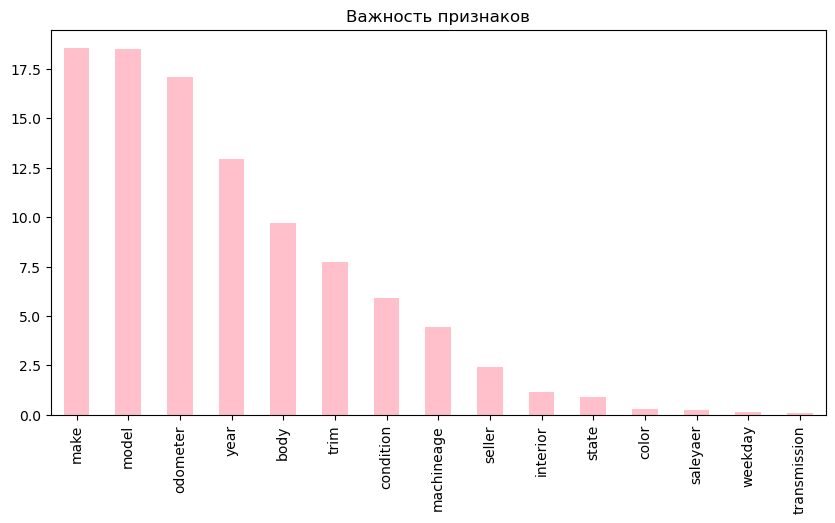

In [39]:
im_df = pd.DataFrame(cbr_or.best_estimator_.feature_importances_,
                     index = features_original_train.columns, columns=['import'])
im_df = im_df.sort_values(by='import', ascending=False)
im_df.plot(kind='bar', figsize=(10, 5), title='–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤', color='pink', legend=False)
plt.show()

## –°–±–æ—Ä –∏—Ç–æ–≥–æ–≤–æ–≥–æ —Ñ–∞–π–ª–∞

In [ ]:
test_original = test_original.merge(vin_test, left_index = True, right_index = True)
test_original = test_original.reset_index()
test_original['sellingprice'] = predict[0]
col = ['vin', 'sellingprice']
submission = test_original[col]
try:
    submission.to_csv("/Users/sirena0789/Desktop/–ê–≤—Ç–æ–º–æ–±–∏–ª–∏/data/submission.csv", index=False)
except:
    submission.to_csv("/content/drive/MyDrive/car_cost/submission.csv", index=False)

## –ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π –¥–ª—è —Ä–µ–≤—å—é

–í –¥–∞–Ω–Ω–æ–º –ø—Ä–æ–µ–∫—Ç–µ —è –ø–æ—Å—Ç–∞—Ä–∞–ª–∞—Å—å —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –∏–¥–µ—é –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è. –ù–∞ —ç—Ç–æ —É—à–ª–æ –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ —Ä–µ—Å—É—Ä—Å–æ–≤, –Ω–æ –ø–æ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—é –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ accuracy –≤–∞—Ä—å–∏—Ä–æ–≤–∞–ª—Å—è –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö 35-95% –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ –∑–∞–ø–æ–ª–Ω—è–µ–º–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞, –∞ MSE –ø–æ —á–∏—Å–ª–µ–Ω–Ω—ã–º —Å—Ç–æ–ª–±—Ü–∞–º –ø–æ–ª—É—á–∞–ª–∞—Å—å –≤ —Ä–∞–π–æ–Ω–µ 44-50%.  
–î–∞–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≥–æ–≤–æ—Ä—è—Ç –æ —Ç–æ–º, —á—Ç–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å–ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã –Ω–µ —Å–æ–≤—Å–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ, –Ω–æ –ª—é–±—ã–µ –¥–µ–π—Å—Ç–≤–∏—è –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω—ã–µ –Ω–∞ —É–ª—É—á—à–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ (–ø–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤, –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –¥—Ä—É–≥–∏—Ö –º–æ–¥–µ–ª–µ–π) —Å–∏–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏–≤–∞–∞–µ—Ç –≤—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã –ø—Ä–æ–≥—Ä–∞–º–º—ã, –ø–æ—ç—Ç–æ–º—É —è —Å—Ç–∞—Ä–∞–ª–∞—Å—å –±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –º–µ–∂–¥—É –∫–∞—á–µ—Å—Ç–≤–æ–º –∏ —Å–∫–æ—Ä–æ—Å—Ç—å—é –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è.  
**–°–æ–≤–µ—Ç –¥–ª—è —Ä–µ–≤—å—é–µ—Ä–∞:** –Ω–µ –∑–∞–ø—É—Å–∫–∞–π –ª–æ–∫–∞–ª—å–Ω–æ –º–æ–¥–µ–ª–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤, –∞ –ª—É—á—à–µ –≤–æ—Å–ø–æ–ª—å–∑—É–π—Å—è —É–∂–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω—ã–º –¥–∞—Ç–∞—Å–µ—Ç–æ–º –∏–∑ –ø—Ä–∏–∫—Ä–µ–ø–ª–µ–Ω–Ω—ã—Ö —Ñ–∞–π–ª–æ–≤. –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —Ç—Ä–µ–±—É–µ—Ç –±–æ–ª—å—à–∏—Ö –æ–±—å–µ–º–æ–≤ –æ–ø–µ—Ä–∞—Ç–∏–≤–∫–∏ –∏ –≤—Ä–µ–º–µ–Ω–∏. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –≤—Å–µ –ª—è–∂–µ—Ç.

–ü–æ —ç—Ç–æ–π –∂–µ –ø—Ä–∏—á–∏–Ω–µ –º–Ω–µ –Ω–µ —É–¥–∞–ª–æ—Å—å —Å–¥–µ–ª–∞—Ç—å –∫–æ–¥–∏—Ä–æ–≤–∫—É —Å –ø–æ–º–æ—â—å—é OHE. –í –∫–æ–¥–µ –ø—Ä–æ–ø–∏—Å–∞–Ω–Ω–∞ —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è —ç—Ç–æ–≥–æ, –Ω–æ –µ–µ –∑–∞–ø—É—Å–∫ —É–±–∏–≤–∞–µ—Ç —è–¥—Ä–æ –º–≥–Ω–æ–≤–µ–Ω–Ω–æ –∏–∑ –∑–∞ –±–æ–ª—å—à–æ–≥–æ –æ–±—å–µ–º–∞ –¥–∞–Ω–Ω—ã—Ö. –õ–µ–≥ –¥–∞–∂–µ V100 —Å 52 –≥–± –æ–ø–µ—Ä–∞—Ç–∏–≤–∫–∏. –¢–∞–∫ –∂–µ —è –ø—Ä–æ–±–æ–≤–∞–ª–∞ –∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å —Å–µ—Ç —á–∞—Å—Ç—è–º–∏, –Ω–æ —ç—Ç–æ —Ç–∞–∫–∂–µ –Ω–µ –ø—Ä–∏–≤–µ–ª–æ –∫ —Ö–æ—Ä–æ—à–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º. –ë–æ–ª—å—à–µ –Ω–∏—á–µ–≥–æ –ø—Ä–∏–¥—É–º–∞—Ç—å –Ω–µ —Å–º–æ–≥–ª–∞.

–ú–Ω–æ—é –±—ã–ª–∏ –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω—ã 2 –º–æ–¥–µ–ª–∏. CatBoost –Ω–∞ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ –∏ –∫–æ–¥–∏—Ä–æ–≤–∫–æ–π –≤–Ω—É—Ç—Ä–∏ —Å–∞–º–æ–π –º–æ–¥–µ–ª–∏, CatBoost –Ω–∞ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–π
LabelEncoder –≤—ã–±–æ—Ä–∫–µ –∏ DecisionTreeRegressor –Ω–∞ –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–Ω–æ–π LabelEncoder –≤—ã–±–æ—Ä–∫–µ —Å–æ —Å–ª–µ–¥—É—é—â–∏–º–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏:

| Model | MAPE |
| ------ | ------ |
| CatBoostRegression + StandardScaler| 0.179147 |
| CatBoostRegression + StandardScaler + LabelEncoder | 0.208977 |
| DecisionTreeRegressor + StandardScaler + LabelEncoder	 | 0.233317 |


–ö —Å–æ–∂–∞–ª–µ–Ω–∏—é, –≤—ã–±–æ—Ä–∫—É —Å OHE –ø–æ –ø—Ä–∏—á–∏–Ω–µ –≤—ã—à–µ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –Ω–µ —É–¥–∞–ª–æ—Å—å. 
–ü–ª—é—Å –µ—Å—Ç—å –µ—â–µ –Ω—é–∞–Ω—Å: MAPE –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –ø–æ—Ä—è–¥–∫–∞ 17-21%, –∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π —è –ø–æ–ª—É—á–∞—é 200%. –ü—Ä–∏—á–∏–Ω—É —è —Ç–∞–∫ –∏ –Ω–µ –≤—ã—è—Å–Ω–∏–ª–∞. –í–µ—Ä–æ—è—Ç–Ω–æ, –≥–¥–µ —Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–∞ –Ω–µ–ø–æ–ª–∞–¥–∫–∞ —Å –∏–Ω–¥–µ–∫—Å–∞–º–∏, –∏–∑ –∑–∞ —á–µ–≥–æ –≤ –∏—Ç–æ–≥–æ–≤–æ–π —Ç–∞–±–ª–∏—Ü–µ –≤—Å–µ –ø–µ—Ä–µ–º–µ—à–∞–ª–æ—Å—å. –ò–ª–∏ –≤—Å–µ —Ç–∞–∫–∏ –ø—Ä–∏—á–∏–Ω–∞ –≤ –Ω–µ–≤–µ—Ä–Ω–æ–π –∫–æ–¥–∏—Ä–æ–≤–∫–µ. –Ø –ø—Ä–æ–±–æ–≤–∞–ª–∞ –∑–∞–≥—Ä—É–∂–∞—Ç—å —Ñ–∞–π–ª—ã —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ —Ä–∞–∑–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, –Ω–æ MAPE –Ω–∞ Kaggle –≤—Å–µ–≥–¥–∞ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω –∏ —Ç–æ—Ç –∂–µ.

–ï—Å–ª–∏ —á–µ—Å—Ç–Ω–æ, —Ç–æ –º–µ–Ω—è —É–∂–µ —Ç–æ—à–Ω–∏—Ç –æ—Ç —ç—Ç–æ–≥–æ –ø—Ä–æ–µ–∫—Ç–∞. –°–ª–∏—à–∫–æ–º –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –∏ —Å–∏–ª —è –Ω–∞ –Ω–µ–≥–æ –ø–æ—Ç—Ä–∞—Ç–∏–ª–∞ –∏ –Ω–µ –¥–æ–±–∏–ª–∞—Å—å –¥–∞–∂–µ —Å–Ω–æ—Å–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.
–£–∂–µ –Ω–µ—Ç –∂–µ–ª–∞–Ω–∏—è, —Å–∏–¥–µ—Ç—å –Ω–∞–¥ –Ω–∏–º –¥–∞–ª—å—à–µ, –ø–æ—ç—Ç–æ–º—É —Å–¥–∞—é –ø—Ä–æ–µ–∫—Ç –≤ —Ç–∞–∫–æ–º –Ω–µ–¥–æ—Ä–∞–±–æ—Ç–∞–Ω–Ω–æ–º —Ñ–æ—Ä–º–∞—Ç–µ —Å –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω–æ–π –º–µ—Ç—Ä–∏–∫–æ–π. –í–æ–∑–º–æ–∂–Ω–æ, —á—Ç–æ –ø–æ–∑–∂–µ —è –∫ –Ω–µ–º—É –≤–µ—Ä–Ω—É—Å—å —Å –Ω–æ–≤—ã–º–∏ –∏–¥–µ—è–º–∏ –∏ –¥–æ—Ä–∞–±–æ—Ç–∞—é. –ë—ã–ª–æ –±—ã –∑–¥–æ—Ä–æ–≤–æ –ø–æ–ª—É—á–∏—Ç—å —Ñ–∞–π–ª —Å —Ç–µ—Å—Ç–æ–≤—ã–º —Ç–∞—Ä–≥–µ—Ç–æ–º –¥–ª—è –ø—Ä–æ–≤–µ—Ä–æ–∫ –±—É–¥—É—â–∏—Ö –∏–¥–µ–π.

–ü—Ä–æ—à—É –ø–æ–Ω—è—Ç—å –∏ –ø—Ä–æ—Å—Ç–∏—Ç—åü´£

## –í–∞—Ä–∏–∞–Ω—Ç—ã —É–ª—É—á—à–µ–Ω–∏—è –ø—Ä–æ–µ–∫—Ç–∞
- –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –º–µ—Ç—Ä–∏–∏–∫—É –≤—ã–±–æ—Ä–∫–∏ —Å –∫–æ–¥–∏—Ä–æ–≤–∫–æ–π OHE 
- –£–ª—É—á—à–∏—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –º–æ–¥–µ–ª–µ–π –¥–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø—É—Ç–µ–º –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏–ª–∏ –ø—É—Ç–µ–º –∏–∑–º–µ–Ω–µ–Ω–∏—è –º–µ—Ç–æ–¥–∞ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö
- –£–¥–∞–ª–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Ç—Ä–µ–π–Ω–µ –∏ —Ç–µ—Å—Ç–µ 
- –û–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–æ–ª—É—á–µ–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–∑ vin (–µ—Å—Ç—å —Å–∞–π—Ç—ã, –≥–¥–µ –ø–æ –∑–∞–ø—Ä–æ—Å—É –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –Ω—É–∂–Ω—ã–µ –Ω–∞–º –¥–∞–Ω–Ω—ã–µ)
- –ü—Ä–æ—Ä–∞–±–æ—Ç–∞—Ç—å –º—É–ª—å—Ç–∏–∫–æ–ª–ª–µ–Ω–∏–∞—Ä–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ —É–¥–∞–ª–∏—Ç—å –ª–∏—à–Ω–∏–µ
- –û–±–Ω–æ–≤–∏—Ç—å —Ñ—Ä–µ–π–º —Å —É—á–µ—Ç–æ–º –¥–∞–Ω–Ω—ã—Ö –æ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è